In [54]:
import numpy as np, matplotlib.pyplot as plt, yfinance as yf, pandas as pd
from statsmodels.tsa.stattools import acf, pacf, adfuller
import scipy.stats as stats, seaborn as sns

start_date = '2018-01-01'
end_date = '2024-03-31'
jpy = 'USDJPY=X'
eur = 'USDEUR=X'
raw_data = yf.download(tickers=[jpy, eur], start=start_date, end=end_date)["Close"]
raw_data = raw_data.rename(columns={eur: "eur", jpy: "jpy"})
all_data = raw_data.copy(deep=True)

[*********************100%***********************]  2 of 2 completed


In [55]:
raw_data.head()
colors = ['#00355f', '#7399c6']

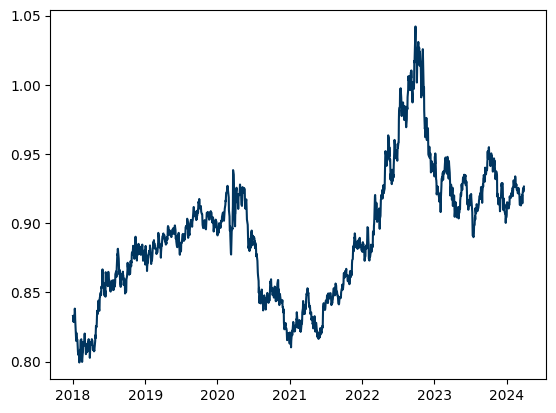

In [56]:
plt.plot(raw_data['eur'], color= colors[0] )

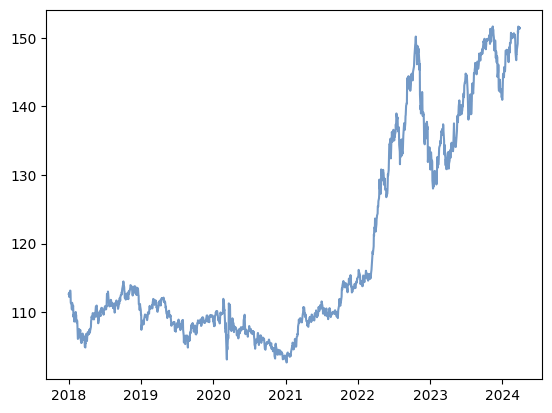

In [57]:
plt.plot(raw_data['jpy'], color= colors[1] )

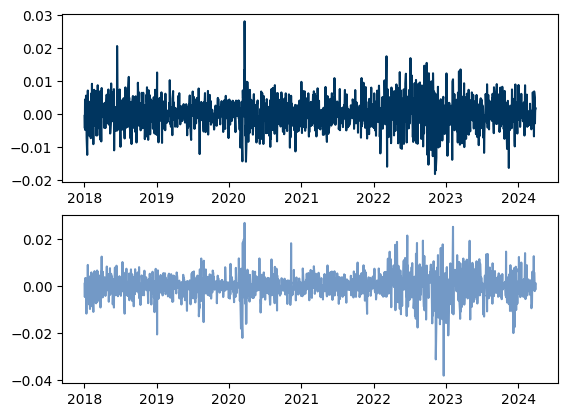

In [111]:
df = np.log(raw_data / raw_data.shift(1))
plt.subplot(2,1,1)
plt.plot(df['eur'], color= colors[0])
plt.subplot(2,1,2)
plt.plot(df['jpy'], color= colors[1])

(array([  1.,   1.,   2.,   1.,   3.,   3.,   5.,   4.,  10.,  13.,  22.,
         23.,  31.,  44.,  74.,  82., 107., 120., 159., 166., 159., 123.,
        114.,  96.,  60.,  55.,  41.,  43.,  18.,  19.,   8.,   4.,   5.,
          3.,   3.,   1.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.01821137, -0.01728427, -0.01635716, -0.01543005, -0.01450294,
        -0.01357583, -0.01264873, -0.01172162, -0.01079451, -0.0098674 ,
        -0.00894029, -0.00801318, -0.00708608, -0.00615897, -0.00523186,
        -0.00430475, -0.00337764, -0.00245053, -0.00152343, -0.00059632,
         0.00033079,  0.0012579 ,  0.00218501,  0.00311211,  0.00403922,
         0.00496633,  0.00589344,  0.00682055,  0.00774766,  0.00867476,
         0.00960187,  0.01052898,  0.01145609,  0.0123832 ,  0.0133103 ,
         0.01423741,  0.01516452,  0.01609163,  0.01701874,  0.01794585,
         0.01887295,  0.01980006,  0.02072717,  0.02165428,  0.02258139,
 

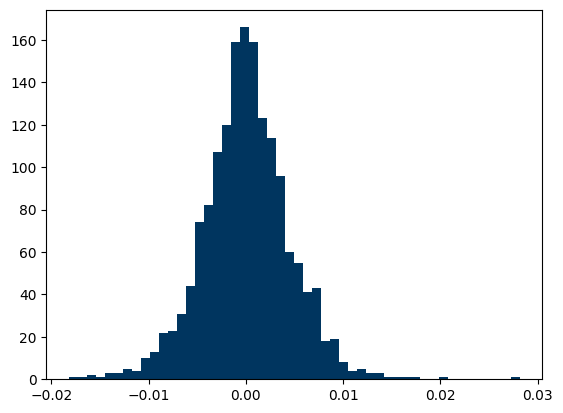

In [59]:

plt.hist(df['eur'], color= colors[0], bins = 50)


In [113]:
df= df.dropna()

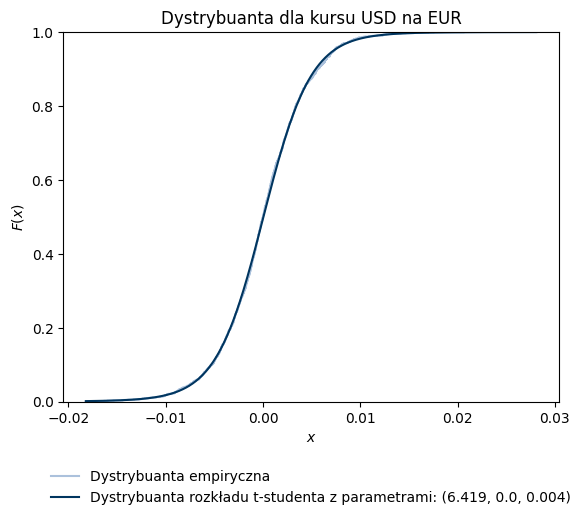

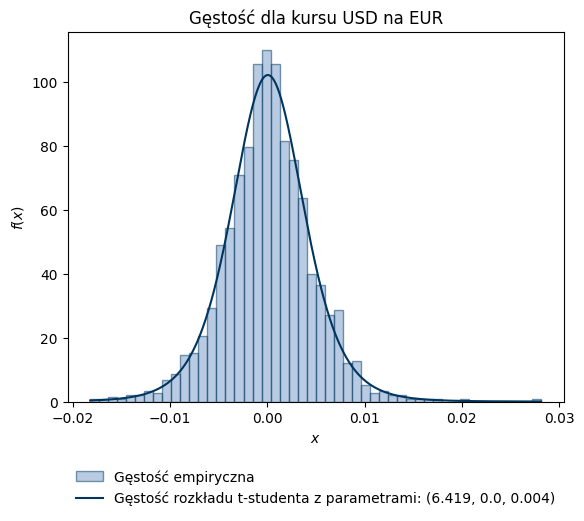

In [65]:
params_jpy = stats.t.fit(df['jpy'])
params_eur = stats.t.fit(df['eur'])
eur = df['eur']
jpy = df['jpy']
t_student_jpy = stats.t(*params_jpy)
t_student_eur = stats.t(*params_eur)

jpy_sample = t_student_jpy.rvs(size=len(jpy))
eur_sample = t_student_eur.rvs(size=len(eur))
sns.ecdfplot(data = eur, label = "Dystrybuanta empiryczna", color = colors[1], alpha = 0.6)

t_eur = np.linspace(np.min(eur), np.max(eur), len(eur))
th_F = t_student_eur.cdf(t_eur)
plt.plot(t_eur, th_F, label = f"Dystrybuanta rozkładu t-studenta z parametrami: {(round(params_eur[0], 3), round(params_eur[1], 3), round(params_eur[2], 3))}",  color = colors[0])

plt.title("Dystrybuanta dla kursu USD na EUR")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.show()

plt.hist(eur, bins = 50, edgecolor=colors[0], density=True, label = "Gęstość empiryczna", color = colors[1], alpha = 0.5)

f_theo = t_student_eur.pdf(t_eur)
plt.plot(t_eur, f_theo, label = f"Gęstość rozkładu t-studenta z parametrami: {(round(params_eur[0], 3), round(params_eur[1], 3), round(params_eur[2], 3))}", color = colors[0])
plt.title("Gęstość dla kursu USD na EUR")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend(frameon=False,  loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.show()

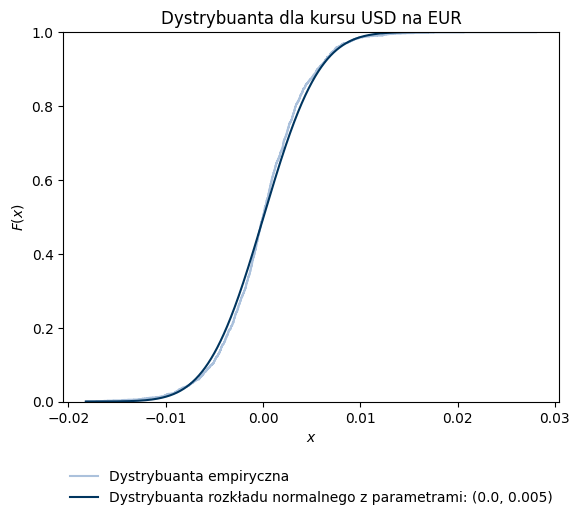

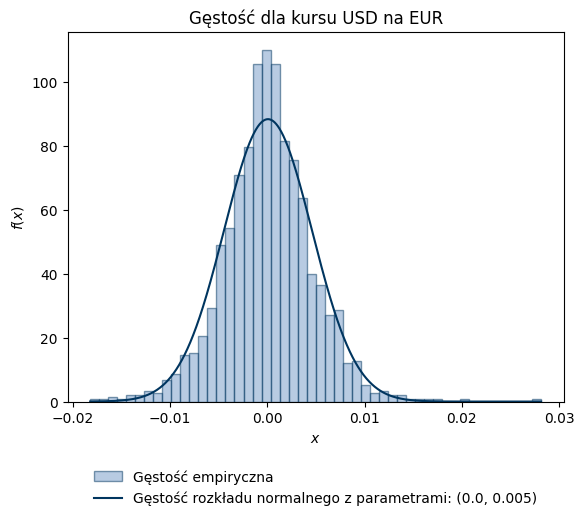

In [118]:
params_jpy = stats.norm.fit(df['jpy'])
params_eur = stats.norm.fit(df['eur'])
eur = df['eur']
jpy = df['jpy']
norm_jpy = stats.norm(*params_jpy)
norm_eur = stats.norm(*params_eur)

jpy_sample = norm_jpy.rvs(size=len(jpy))
eur_sample = norm_eur.rvs(size=len(eur))
sns.ecdfplot(data = eur, label = "Dystrybuanta empiryczna", color = colors[1], alpha = 0.6)

t_eur = np.linspace(np.min(eur), np.max(eur), len(eur))
th_F = norm_eur.cdf(t_eur)
plt.plot(t_eur, th_F, label = f"Dystrybuanta rozkładu normalnego z parametrami: {(round(params_eur[0], 3), round(params_eur[1], 3))}",  color = colors[0])

plt.title("Dystrybuanta dla kursu USD na EUR")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.show()

plt.hist(eur, bins = 50, edgecolor=colors[0], density=True, label = "Gęstość empiryczna", color = colors[1], alpha = 0.5)

f_theo = norm_eur.pdf(t_eur)
plt.plot(t_eur, f_theo, label = f"Gęstość rozkładu normalnego z parametrami: {(round(params_eur[0], 3), round(params_eur[1], 3))}", color = colors[0])
plt.title("Gęstość dla kursu USD na EUR")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend(frameon=False,  loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.show()

In [ ]:
def expected_shortfall(returns, alpha):
    var = returns.quantile(alpha)
    es = returns[returns <= var].mean()
    return es

In [79]:
from scipy.stats import t

# log_returns: np.array lub pd.Series
mu = params_eur[1]
sigma = params_eur[2]
nu = params_eur[0]

# Quantile dla 5% (dla VaR 95%)
q95 = t.ppf(0.05, df=nu)
q99 = t.ppf(0.01, df = nu)

VaR_95 = -(mu + sigma * q95)
VaR_99 = -(mu + sigma * q99)
VaR_95, VaR_99


(0.007172349504453953, 0.01151489965450818)

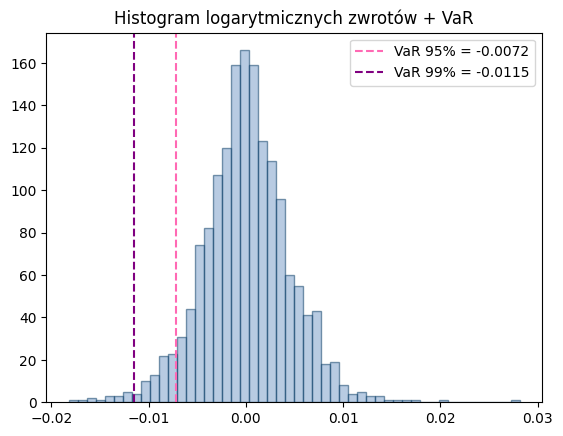

In [80]:
plt.hist(eur, bins = 50,edgecolor = colors[0], color = colors[1], alpha = 0.5)
plt.axvline(-VaR_95, color="hotpink", linestyle="--", linewidth=1.5, label=f"VaR 95% = {-VaR_95:.4f}")
plt.axvline(-VaR_99, color="purple", linestyle="--", linewidth=1.5, label=f"VaR 99% = {-VaR_99:.4f}")
plt.title("Histogram logarytmicznych zwrotów + VaR")
plt.legend()

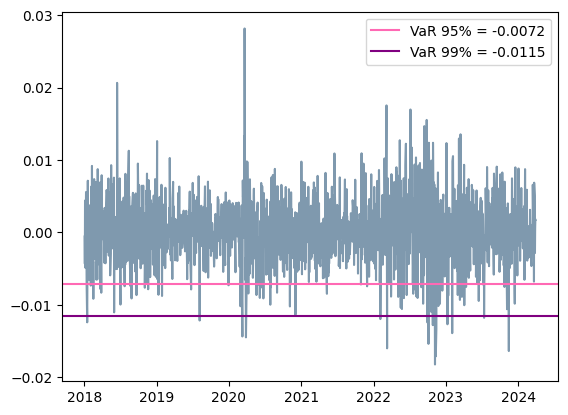

In [81]:
plt.plot(eur, color = colors[0], alpha = 0.5)
plt.axhline(y = -VaR_95, color = 'hotpink', label=f"VaR 95% = {-VaR_95:.4f}")
plt.axhline(y = -VaR_99, color = 'purple', label=f"VaR 99% = {-VaR_99:.4f}")
plt.legend()

In [164]:
rolling_window = 250
confidence_levels = [0.05, 0.01]

VaR_results = []

for i in range(rolling_window, len(eur)):
    train_data = eur[i - rolling_window:i]       
    actual_return = eur[i]                       

    params = stats.t.fit(train_data)
    df_p, loc, scale = params

    # Oblicz VaR na dany poziom
    VaR95 = (loc + scale * t.ppf(0.05, df = df_p))
    var95 = np.percentile(train_data, 5) 
    evar95 = train_data[train_data < var95].mean() 
    VaR99 = (loc + scale * t.ppf(0.01, df = df_p))
    var99 = np.percentile(train_data, 1) 
    evar99 = train_data[train_data < var99].mean() 
    VaR_results.append({
    'date': eur.index[i],
    'actual': actual_return,
    'df': df,
    'loc': loc,
    'scale': scale,
    'Var95': VaR95,
    'var95': var95,
    'evar95': evar95,
    'Var99': VaR99,
    'var99': var99,
    'evar99': evar99
})

var_df = pd.DataFrame(VaR_results).set_index('date')


C:\Users\Maria Nowacka\AppData\Local\Temp\ipykernel_6200\2049229422.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  actual_return = eur[i]


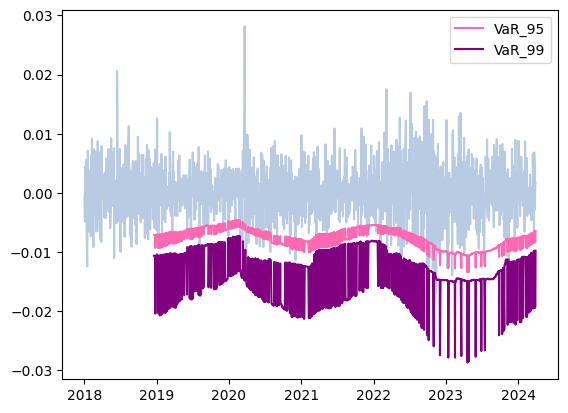

In [165]:
plt.plot(eur, color = colors[1], alpha = 0.5)
plt.plot(var_df['Var95'], color = 'hotpink', label = 'VaR_95')
plt.plot(var_df['Var99'], color = 'purple', label = 'VaR_99')
plt.legend()

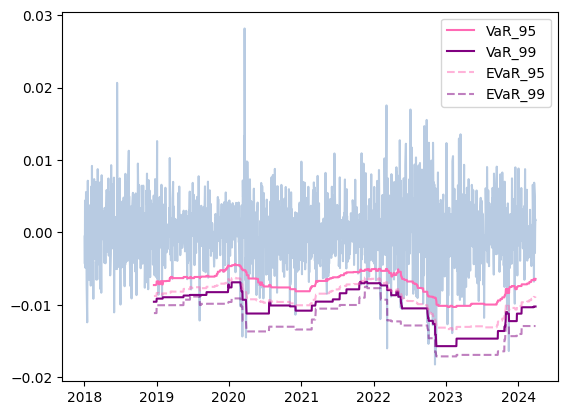

In [166]:
plt.plot(eur, color = colors[1], alpha = 0.5)
plt.plot(var_df['var95'], color = 'hotpink', label = 'VaR_95')
plt.plot(var_df['var99'], color = 'purple', label = 'VaR_99')
plt.plot(var_df['evar95'], color = 'hotpink', label = 'EVaR_95', ls = '--', alpha = 0.5)
plt.plot(var_df['evar99'], color = 'purple', label = 'EVaR_99', ls = '--', alpha = 0.5)
plt.legend()

In [119]:
var95Paramp = np.zeros(250)
var99Paramp = np.zeros(250)
for i in range(250):
    treningowy = eur[i:-250+i]
    df_t, loc_t, scale_t = stats.t.fit(treningowy)
    t_student95 = t.ppf(0.05,df=df_t, loc=loc_t, scale=scale_t)
    t_student99 = t.ppf(0.01,df=df_t, loc=loc_t, scale=scale_t)
    var95Paramp[i] = t_student95
    var99Paramp[i] = t_student99

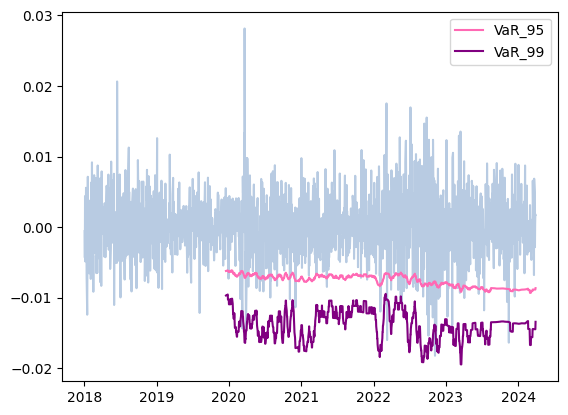

In [102]:
# var_df[0.95].rolling(5).mean()
plt.plot(eur, color = colors[1], alpha = 0.5)
plt.plot(var_df[0.05].rolling(10).mean(), color = 'hotpink', label = 'VaR_95')
plt.plot(var_df[0.01].rolling(10).mean(), color = 'purple', label = 'VaR_99')
plt.legend()

In [167]:
var_df

,actual,df,loc,scale,Var95,var95,evar95,Var99,var99,evar99
date,,,,,,,,,,
2018-12-18,-0.003874,15.271081,0.000207,0.004169,-0.007093,-0.007254,-0.008766,-0.010620,-0.009555,-0.011122
2018-12-19,-0.002250,15.271081,0.000193,0.004185,-0.007122,-0.007254,-0.008766,-0.010639,-0.009555,-0.011122
2018-12-20,-0.001241,15.271081,0.000201,0.004172,-0.007101,-0.007254,-0.008766,-0.010625,-0.009555,-0.011122
2018-12-21,-0.005894,15.271081,0.000174,0.004154,-0.007113,-0.007254,-0.008766,-0.010649,-0.009555,-0.011122
2018-12-24,0.007362,15.271081,0.000171,0.004162,-0.007126,-0.007254,-0.008766,-0.010661,-0.009555,-0.011122
...,...,...,...,...,...,...,...,...,...,...
2024-03-25,0.005060,15.271081,0.000061,0.003706,-0.006529,-0.006564,-0.008905,-0.009833,-0.010215,-0.012908
2024-03-26,-0.002836,15.271081,-0.000165,0.002857,-0.008372,-0.006564,-0.008905,-0.019429,-0.010215,-0.012908
2024-03-27,0.000542,15.271081,-0.000201,0.002854,-0.008364,-0.006564,-0.008905,-0.019279,-0.010215,-0.012908


Test kupca

In [104]:
import numpy as np
from scipy.stats import chi2

# Parametry

T = len(var_df)
failures = (var_df['actual'] < var_df['var95']).sum()
p = 1 - alpha
x_hat = failures / T

# Statystyka testowa
LR_pof = -2 * (failures * np.log(p / x_hat) + (T - failures) * np.log((1 - p) / (1 - x_hat)))

# Wartość p-value
p_value = 1 - chi2.cdf(LR_pof, df=1)

print(f"Liczba przekroczeń: {failures} na {T}")
print(f"Statystyka Kupca: {LR_pof:.4f}")
print(f"P-value: {p_value:.4f}")


Liczba przekroczeń: 64 na 1128
Statystyka Kupca: 5889.9130
P-value: 0.0000


## Monte Carlo

In [141]:
var95montecarlo = np.zeros(250)
var99montecarlo = np.zeros(250)
for i in range(250):
    treningowy = eur[i:-250+i]
    df_t, loc_t, scale_t = stats.t.fit(treningowy)
    t_student95 = t.rvs(df=df_t, loc=loc_t, scale=scale_t, size = 10000)
    t_student99 = t.rvs(df=df_t, loc=loc_t, scale=scale_t, size = 10000)
    var95montecarlo[i] = np.quantile(t_student95, 0.05)
    var99montecarlo[i] = np.quantile(t_student99, 0.01)

In [176]:
rolling_window = 250  

VaR_mc_results = []
for i in range(rolling_window, len(eur)):
    train_data = eur[i - rolling_window:i]       # dane z przeszłości
    actual_return = eur[i]                       # zwrot do porównania
    params = stats.t.fit(train_data)
    df_mc, loc_mc, scale_mc = params

    sample = t.rvs(df=df_mc, loc=loc_mc, scale=scale_mc, size = 10000)
    VaR_95 = np.quantile(sample, 0.05)
    VaR_99 = np.quantile(sample, 0.01)
    var95 = np.percentile(sample, 5)
    evar95 = sample[sample < var95].mean()
    var99 = np.percentile(sample, 1)
    evar99 = sample[sample < var99].mean()
    VaR_mc_results.append({
    'date': eur.index[i],
    'actual': actual_return,
    'df': df,
    'loc': loc,
    'scale': scale,
    'Var95': VaR95,
    'var95': var95,
    'evar95': evar95,
    'Var99': VaR99,
    'var99': var99,
    'evar99': evar99
})

var_mc = pd.DataFrame(VaR_mc_results).set_index('date')

C:\Users\Maria Nowacka\AppData\Local\Temp\ipykernel_6200\2346503069.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  actual_return = eur[i]                       # zwrot do porównania


In [177]:
var_mc

,actual,df,loc,scale,Var95,var95,evar95,Var99,var99,evar99
date,,,,,,,,,,
2018-12-18,-0.003874,15.271081,0.000107,0.003654,-0.006429,-0.007225,-0.009498,-0.009753,-0.010753,-0.012934
2018-12-19,-0.002250,15.271081,0.000107,0.003654,-0.006429,-0.007116,-0.009259,-0.009753,-0.010553,-0.012619
2018-12-20,-0.001241,15.271081,0.000107,0.003654,-0.006429,-0.006978,-0.009028,-0.009753,-0.010357,-0.012372
2018-12-21,-0.005894,15.271081,0.000107,0.003654,-0.006429,-0.007032,-0.009188,-0.009753,-0.010643,-0.012732
2018-12-24,0.007362,15.271081,0.000107,0.003654,-0.006429,-0.007188,-0.009358,-0.009753,-0.010700,-0.012578
...,...,...,...,...,...,...,...,...,...,...
2024-03-25,0.005060,15.271081,0.000107,0.003654,-0.006429,-0.006372,-0.008511,-0.009753,-0.009930,-0.012169
2024-03-26,-0.002836,15.271081,0.000107,0.003654,-0.006429,-0.008198,-0.015700,-0.009753,-0.019205,-0.032082
2024-03-27,0.000542,15.271081,0.000107,0.003654,-0.006429,-0.008349,-0.016706,-0.009753,-0.019322,-0.036075


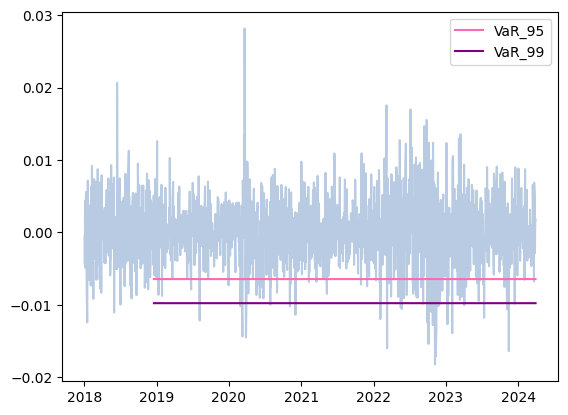

In [178]:
plt.plot(eur, color = colors[1], alpha = 0.5)
plt.plot(var_mc['Var95'], color = 'hotpink', label = 'VaR_95')
plt.plot(var_mc['Var99'], color = 'purple', label = 'VaR_99')
plt.legend()

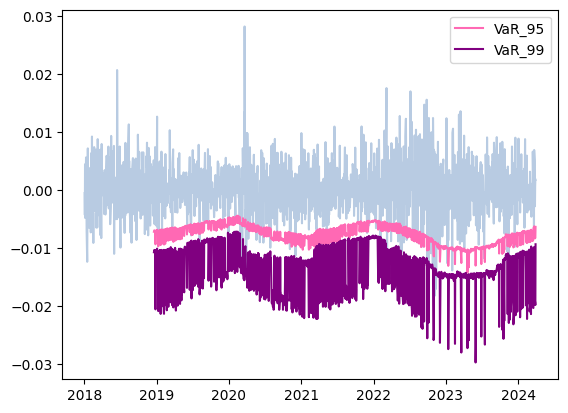

In [179]:
plt.plot(eur, color = colors[1], alpha = 0.5)
plt.plot(var_mc['var95'], color = 'hotpink', label = 'VaR_95')
plt.plot(var_mc['var99'], color = 'purple', label = 'VaR_99')
# plt.plot(var_mc['evar95'], color = 'hotpink', label = 'EVaR_95', ls = ':', alpha = 0.5)
# plt.plot(var_mc['evar99'], color = 'purple', label = 'EVaR_99', ls = ':', alpha = 0.5)
plt.legend()

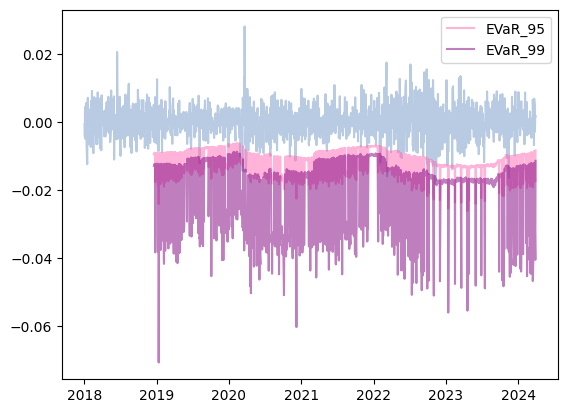

In [181]:
plt.plot(eur, color = colors[1], alpha = 0.5)
# plt.plot(var_mc['var95'], color = 'hotpink', label = 'VaR_95')
# plt.plot(var_mc['var99'], color = 'purple', label = 'VaR_99')
plt.plot(var_mc['evar95'], color = 'hotpink', label = 'EVaR_95', alpha = 0.5)
plt.plot(var_mc['evar99'], color = 'purple', label = 'EVaR_99', alpha = 0.5)
plt.legend()

In [136]:
from scipy.stats import t
train_data = eur.iloc[0:np.floor(5/7*len(eur)).astype(int)]
params = t.fit(train_data)
df, loc, scale = params
simulated_returns = t.rvs(df, loc=loc, scale=scale, size=10_000)
VaR_95_mc = -np.percentile(simulated_returns, 5)
VaR_99_mc = -np.percentile(simulated_returns, 1)

var_mc['violation_95'] = var_mc['actual'] < -var_mc['VaR95']
var_mc['violation_99'] = var_mc['actual'] < -var_mc['VaR99']
print('Przekroczenia 95%:', var_mc['violation_95'].sum())
print('Przekroczenia 99%:', var_mc['violation_99'].sum())


expected_shortfall = -simulated_returns[simulated_returns < -VaR_95_mc].mean()


Przekroczenia 95%: 1068
Przekroczenia 99%: 1120


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import t

rolling_window = 250
confidence_levels = [0.95, 0.99]
n_sim = 10000

results_mc = []

for i in range(rolling_window, len(eur)):
    train_data = eur[i - rolling_window:i]
    actual_return = eur[i]
    date = eur.index[i]

    # Dopasowanie rozkładu t-Studenta
    df, loc, scale = t.fit(train_data)

    # Monte Carlo - symulacja losowa
    simulated_returns = t.rvs(df, loc=loc, scale=scale, size=n_sim)

    # VaR i EVaR (Expected Shortfall)
    entry = {'date': date, 'actual': actual_return}
    
    for cl in confidence_levels:
        alpha = 1 - cl
        var = -np.percentile(simulated_returns, alpha * 100)
        evar = -simulated_returns[simulated_returns < -var].mean()
        entry[f'VaR_{int(cl*100)}'] = var
        entry[f'EVaR_{int(cl*100)}'] = evar
    
    results_mc.append(entry)

# Tworzymy DataFrame z wynikami
mc_df = pd.DataFrame(results_mc).set_index('date')


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(eur[-len(mc_df):], label='Log-zwroty', alpha=0.5)
plt.plot(mc_df['VaR_95'], label='VaR 95%', color='hotpink')
plt.plot(mc_df['VaR_99'], label='VaR 99%', color='purple')
plt.legend()
plt.title('Monte Carlo VaR vs Rzeczywiste Zwroty')
plt.grid(True)
plt.show()


In [ ]:
mc_df['violation_95'] = eur[mc_df.index] < -mc_df['VaR_95']
mc_df['violation_99'] = eur[mc_df.index] < -mc_df['VaR_99']

print("Liczba przekroczeń (95%):", mc_df['violation_95'].sum())
print("Liczba przekroczeń (99%):", mc_df['violation_99'].sum())


In [185]:
def calculate_exceptions(returns, VaR_series):
    # 1, gdy strata przekracza VaR, 0 w przeciwnym przypadku
    exceptions = (returns < VaR_series).astype(int)
    return exceptions

from statsmodels.stats.proportion import proportions_ztest

def kupiec_test(exceptions, alpha):
    n_exceptions = exceptions.sum()
    n = len(exceptions)
    stat, p_value = proportions_ztest(n_exceptions, n, alpha)
    return p_value

def christoffersen_test(exceptions):
    n = len(exceptions)
    n00 = np.sum((exceptions[:-1] == 0) & (exceptions[1:] == 0))
    n01 = np.sum((exceptions[:-1] == 0) & (exceptions[1:] == 1))
    n10 = np.sum((exceptions[:-1] == 1) & (exceptions[1:] == 0))
    n11 = np.sum((exceptions[:-1] == 1) & (exceptions[1:] == 1))
    pi01 = n01 / (n00 + n01) if (n00 + n01) > 0 else 0
    pi11 = n11 / (n10 + n11) if (n10 + n11) > 0 else 0
    pi = (n01 + n11) / (n00 + n01 + n10 + n11)
    L0 = (n01 + n11) * np.log(pi) + (n00 + n10) * np.log(1 - pi)
    L1 = n00 * np.log(1 - pi01) + n01 * np.log(pi01) + n10 * np.log(1 - pi11) + n11 * np.log(pi11)
    LR_stat = -2 * (L0 - L1)
    p_value = 1 - stats.chi2.cdf(LR_stat, df=1)
    return p_value

def percent_exceptions(exceptions):
    return exceptions.sum() / len(exceptions)

# 9. Testy dla VaR 95%

alpha_95 = 0.05
exceptions_95_zwykla = calculate_exceptions(var_df['actual'], var_df['var95'])
ex_mc_95 = calculate_exceptions(var_mc['actual'], var_mc['var95'])
print("===== VaR 95% =====")
print("Test Kupca zwykła:", kupiec_test(exceptions_95_zwykla, alpha_95))
print("Test Christoffersena zwykła:", christoffersen_test(exceptions_95_zwykla.values))
print("Procent przekroczeń zwykła:", percent_exceptions(exceptions_95_zwykla))
print("Test Kupca niezwykła:", kupiec_test(ex_mc_95, alpha_95))
print("Test Christoffersena niezwykła:", christoffersen_test(ex_mc_95.values))
print("Procent przekroczeń niezwykła:", percent_exceptions(ex_mc_95))
alpha_99 = 0.01

ex_99 = calculate_exceptions(var_df['actual'], var_df['var99'])
ex_mc_99 = calculate_exceptions(var_mc['actual'], var_mc['var99'])
print("===== VaR 99% =====")
print("Test Kupca zwykła:", kupiec_test(ex_99, alpha_99))
print("Test Christoffersena zwykła:", christoffersen_test(ex_99.values))
print("Procent przekroczeń zwykła:", percent_exceptions(ex_99))
print("Test Kupca niezwykła:", kupiec_test(ex_mc_99, alpha_99))
print("Test Christoffersena niezwykła:", christoffersen_test(ex_mc_99.values))
print("Procent przekroczeń niezwykła:", percent_exceptions(ex_mc_99))




===== VaR 95% =====
Test Kupca zwykła: 0.46884767367851066
Test Christoffersena zwykła: 0.023849472537341487
Procent przekroczeń zwykła: 0.054426705370101594
Test Kupca niezwykła: 0.9901449403208513
Test Christoffersena niezwykła: 0.025367965592843156
Procent przekroczeń niezwykła: 0.050072568940493466
===== VaR 99% =====
Test Kupca zwykła: 0.023534975813952225
Test Christoffersena zwykła: 0.4741450706081708
Procent przekroczeń zwykła: 0.018142235123367198
Test Kupca niezwykła: 0.010195337585314782
Test Christoffersena niezwykła: nan
Procent przekroczeń niezwykła: 0.0050798258345428155


C:\Users\Maria Nowacka\AppData\Local\Temp\ipykernel_6200\1636663939.py:24: RuntimeWarning: divide by zero encountered in log
  L1 = n00 * np.log(1 - pi01) + n01 * np.log(pi01) + n10 * np.log(1 - pi11) + n11 * np.log(pi11)
C:\Users\Maria Nowacka\AppData\Local\Temp\ipykernel_6200\1636663939.py:24: RuntimeWarning: invalid value encountered in scalar multiply
  L1 = n00 * np.log(1 - pi01) + n01 * np.log(pi01) + n10 * np.log(1 - pi11) + n11 * np.log(pi11)


In [186]:
def christoffersen_test(exceptions):
    n = len(exceptions)
    n00 = np.sum((exceptions[:-1] == 0) & (exceptions[1:] == 0))
    n01 = np.sum((exceptions[:-1] == 0) & (exceptions[1:] == 1))
    n10 = np.sum((exceptions[:-1] == 1) & (exceptions[1:] == 0))
    n11 = np.sum((exceptions[:-1] == 1) & (exceptions[1:] == 1))
    
    # Dodanie ochrony dla braku przekroczeń
    total_transitions = n00 + n01 + n10 + n11
    if total_transitions == 0:
        return np.nan  # nie da się policzyć testu
    
    pi01 = n01 / (n00 + n01) if (n00 + n01) > 0 else 0
    pi11 = n11 / (n10 + n11) if (n10 + n11) > 0 else 0
    pi = (n01 + n11) / total_transitions

    # Bezpieczne wartości do logarytmowania
    epsilon = 1e-10
    pi01 = np.clip(pi01, epsilon, 1 - epsilon)
    pi11 = np.clip(pi11, epsilon, 1 - epsilon)
    pi = np.clip(pi, epsilon, 1 - epsilon)

    L0 = (n01 + n11) * np.log(pi) + (n00 + n10) * np.log(1 - pi)
    L1 = (
        n00 * np.log(1 - pi01) +
        n01 * np.log(pi01) +
        n10 * np.log(1 - pi11) +
        n11 * np.log(pi11)
    )

    LR_stat = -2 * (L0 - L1)
    p_value = 1 - stats.chi2.cdf(LR_stat, df=1)
    return p_value


In [187]:
print("===== VaR 99% =====")
print("Test Kupca zwykła:", kupiec_test(ex_99, alpha_99))
print("Test Christoffersena zwykła:", christoffersen_test(ex_99.values))
print("Procent przekroczeń zwykła:", percent_exceptions(ex_99))
print("Test Kupca niezwykła:", kupiec_test(ex_mc_99, alpha_99))
print("Test Christoffersena niezwykła:", christoffersen_test(ex_mc_99.values))
print("Procent przekroczeń niezwykła:", percent_exceptions(ex_mc_99))


===== VaR 99% =====
Test Kupca zwykła: 0.023534975813952225
Test Christoffersena zwykła: 0.4741450706081708
Procent przekroczeń zwykła: 0.018142235123367198
Test Kupca niezwykła: 0.010195337585314782
Test Christoffersena niezwykła: 0.7891174475156548
Procent przekroczeń niezwykła: 0.0050798258345428155


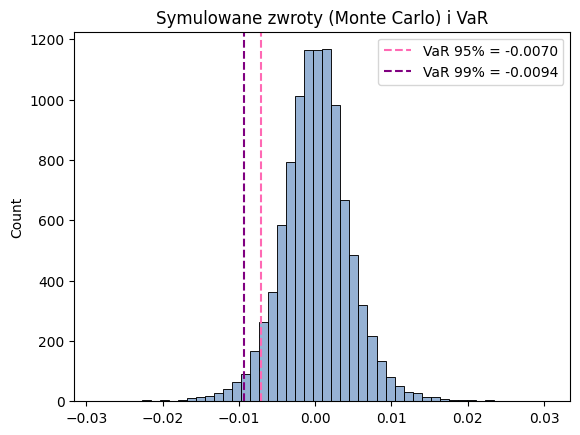

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

# Załóżmy, że masz ostatnią próbkę z MC:
sample = t.rvs(df=nu, loc=mu, scale=sigma, size=10000)
VaR_95 = np.quantile(sample, 0.05)
VaR99 = np.quantile(sample, 0.01)

# Wykres
# plt.figure(figsize=(10, 6))
sns.histplot(sample, bins=50, kde=False, color=colors[1])
plt.axvline(x=VaR_95, color='hotpink', ls = '--',label=f'VaR 95% = {VaR_95:.4f}')
plt.axvline(x=VaR_99, color='purple', ls='--',label=f'VaR 99% = {VaR_99:.4f}')
plt.title('Symulowane zwroty (Monte Carlo) i VaR')
plt.legend()
plt.show()
